This notebook will be used to test the script defined in this folder.

In [291]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import imp
import sys
sys.path.append("/Users/sandesh/repos/quantum-ml/Nanowire Model/")

## Testing of the potential profile script

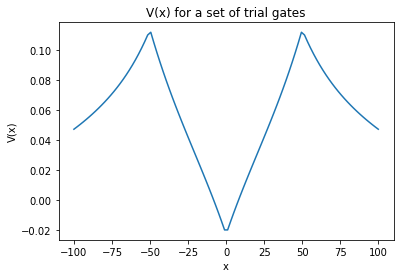

In [98]:
import potential_profile
N_grid = 100
x = np.linspace(-100,100,N_grid,endpoint=True)

# trial potential profile
gate1 = {'peak' : 150e-3,'mean' : -50,'rho' : 5, 'h' : 50,'screen' : 50,'alpha' : 1.0}
gate2 = {'peak' : -150e-3,'mean' : 0,'rho' : 5, 'h' : 50,'screen' : 50,'alpha' : 1.0}
gate3 = {'peak' : 150e-3,'mean' : 50,'rho' : 5, 'h' : 50,'screen' : 50,'alpha' : 1.0}
trial_gates = [gate1,gate2,gate3]

V = potential_profile.calc_V(x,trial_gates)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

## Testing of the ThomasFermi class

KeyError: 'bias'

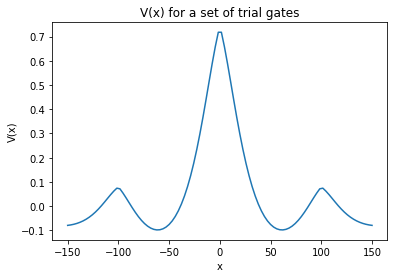

In [261]:
import potential_profile
import thomas_fermi
imp.reload(thomas_fermi)

# trial potential profile
N_grid = 100
system_size = 300
x = np.linspace(-system_size/2,system_size/2,N_grid,endpoint=True)

gate1 = {'peak' : 200e-3,'mean' : -100,'rho' : 50, 'h' : 25,'screen' : 50,'alpha' : 1.0}
gate2 = {'peak' : 800e-3,'mean' : 0,'rho' : 50, 'h' : 25,'screen' : 50,'alpha' : 1.0}
gate3 = {'peak' : 200e-3,'mean' : 100,'rho' : 50, 'h' : 25,'screen' : 50,'alpha' : 1.0}
gates = [gate1,gate2,gate3]

V = potential_profile.calc_V(x,gates)
plt.figure(1)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

physics = {'x' : x,
           'V' : V,
           'K_0' : 1e-2, 
           'sigma' : 1.0,
           'mu' : 0.1,
           'D' : 2,
           'g_0' : 1e0,
           'c_k' : 1e-3,
           'beta' : 1000,
           'kT' : 1e-5,
           'WKB_coeff' : 1,
           'barrier_tunnel_rate' : 10.0,
           'V_L' : 5e-5,
           'V_R' : -5e-5,
           'short_circuit_current' : 1.0,
           'attempt_rate_coef' : 1,
           'sensors' : [(0,50)],
           'barrier_current' : 1.0,
           }
K_mat = thomas_fermi.calc_K_mat(x,physics['K_0'],physics['sigma'])
physics['K_mat'] = K_mat
physics['bias'] = physics['V_L'] - physics['V_R']

tf = thomas_fermi.ThomasFermi(physics)
output = tf.output_wrapper()

print(output)

plt.figure(2)
plt.plot(x,tf.n)
plt.xlabel('x')
plt.ylabel('n(x)')
plt.title("n(x) for a set of trial gates");

# Testing of Random Single Dot script

In [266]:
import random_single_dot
imp.reload(random_single_dot)

result = random_single_dot.calc_plunger_trace(10000)

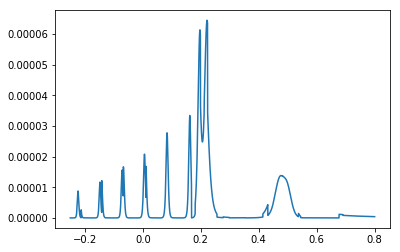

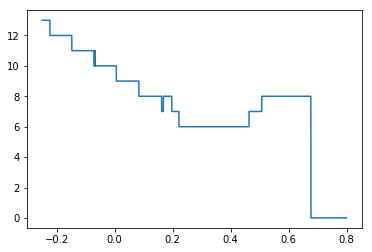

In [267]:
V_P_vec = result['V_P_vec']
current_vec = [x['current'] for x in result['output']]
charge_vec = [np.sum(x['charge']) for x in result['output']]
plt.figure(1)
plt.plot(V_P_vec,current_vec)
plt.figure(2)
plt.plot(V_P_vec,charge_vec)

In [85]:
%load_ext line_profiler
%lprun

In [ ]:
## single dot parallelism
import ipyparallel as ipp
rc = ipp.Client()
lview = rc.direct_view()
lview.block = True

@lview.parallel()
def f(n):
    import sys
    sys.path.append('/Users/sandesh/repos/quantum-ml/Nanowire Model')
    import random_single_dot
    random_single_dot.calc_1D_trace(256)

f.map(range(1))

## Single Dot Barrier map

In [307]:
import random_single_dot
imp.reload(random_single_dot)

N_v = 100
st = time.time()
%lprun -f thomas_fermi.ThomasFermi.calc_WKB_prob res = random_single_dot.calc_barrier_map(N_v,V_p = -200e-3)
print("Total time",time.time()-st)

/Users/sandesh/repos/quantum-ml/Nanowire Model/thomas_fermi.py:80: RuntimeWarning: overflow encountered in exp
  output = (g_0/beta) * np.log(1 + np.exp(beta * x))
/Users/sandesh/repos/quantum-ml/Nanowire Model/thomas_fermi.py:94: RuntimeWarning: invalid value encountered in subtract
  if (i > 10) and (np.linalg.norm(n - n_prev)**2 < (1e-12) * np.linalg.norm(n) * np.linalg.norm(n_prev)):


IndexError: list index out of range

> /Users/sandesh/repos/quantum-ml/Nanowire Model/thomas_fermi.py(134)calc_islands()
    132             self.state = -1
    133         # if left and right leads are present
--> 134         elif(islands[0][0] == 0 and islands[-1][1] == len(n) - 1):
    135             islands.pop(0)
    136             islands.pop(-1)

ipdb> p islands
[]
ipdb> p n
array([  1.40864933e-01,   1.31982248e-01,   1.18718654e-01,
         1.02187931e-01,   8.25625551e-02,   5.98274691e-02,
         3.39865228e-02,   5.33493782e-03,   2.51088039e-14,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.09497900e-05,   3.12958274e-02,
         6.56790085e-02,   9.78665031e-02,   1.27883697e-01,
         1.55970235e-01,   1.82449231e-0

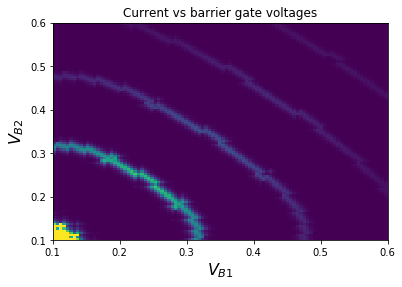

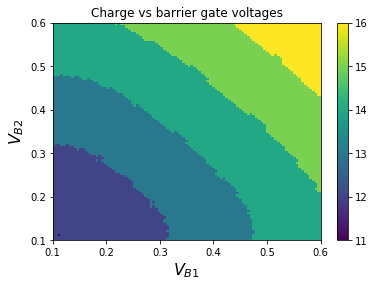

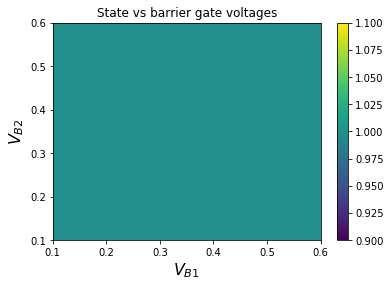

In [309]:
V_B1= np.array(res['V_B1_vec'])
V_B2= np.array(res['V_B2_vec'])
XX,YY = np.meshgrid(V_B1,V_B2)


current_vec = np.array([x['current'] for x in res['output']])
charge_vec = np.array([np.sum(x['charge']) for x in res['output']])
state_vec = np.array([x['state'] for x in res['output']])

plt.figure(1)
plt.pcolor(XX,YY,current_vec.reshape(N_v,N_v),vmax=1e-5)
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Current vs barrier gate voltages")
plt.figure(2)
plt.pcolor(XX,YY,charge_vec.reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Charge vs barrier gate voltages")
cbar = plt.colorbar()
plt.figure(3)
plt.pcolor(XX,YY,state_vec.reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("State vs barrier gate voltages")
cbar = plt.colorbar()

In [34]:
## double dot parallelism
import ipyparallel as ipp
rc = ipp.Client()
lview = rc.direct_view()
lview.block = True

@lview.parallel()
def f(n):
    import sys
    sys.path.append('/Users/sandesh/repos/quantum-ml/Nanowire Model')
    import random_single_dot
    random_single_dot.calc_barrier_map(100)

f.map(range(100))

/usr/local/lib/python3.5/site-packages/ipyparallel/client/client.py:442: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@192.168.1.133')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


<AsyncMapResult: f>

10


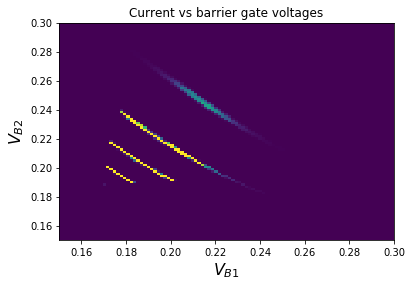

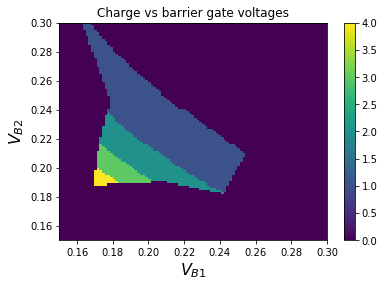

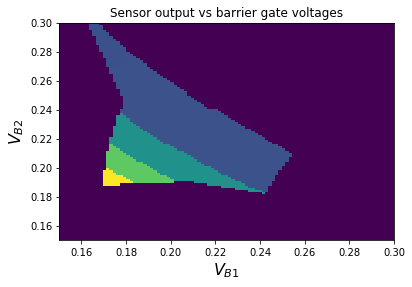

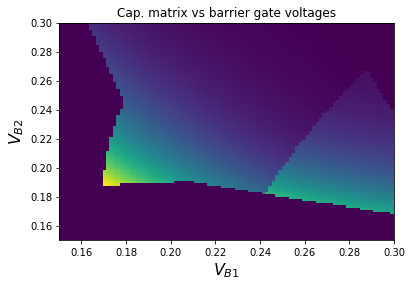

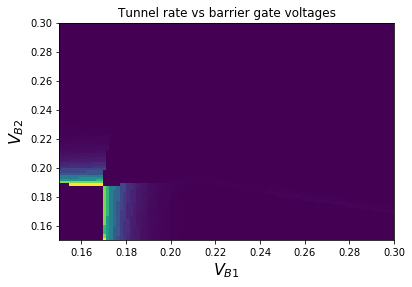

In [48]:
import glob
files = glob.glob("/Users/sandesh/data/single_dot/20171106-06*")
print(len(files))
res = np.load(files[6]).item()
V_B1= np.array(res['V_gate']).reshape(N_v,N_v,2)[0,:,1]
V_B2= np.array(res['V_gate']).reshape(N_v,N_v,2)[0,:,1]
XX,YY = np.meshgrid(V_B1,V_B2)

plt.figure(1)
plt.pcolor(XX,YY,np.array(res['current']).reshape(N_v,N_v),vmax=1e-5)
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Current vs barrier gate voltages")
plt.figure(2)
plt.pcolor(XX,YY,np.array(res['charge']).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Charge vs barrier gate voltages")
cbar = plt.colorbar()
plt.figure(3)
plt.pcolor(XX,YY,np.array(res['sensor']).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Sensor output vs barrier gate voltages")
plt.figure(4)
plt.pcolor(XX,YY,np.array([np.sum(y[0]) for y in res['cap_model']]).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Cap. matrix vs barrier gate voltages")
plt.figure(5)
plt.pcolor(XX,YY,np.array([y[0] for y in res['tunnel_vec']]).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Tunnel rate vs barrier gate voltages")

In [308]:
%pdb

Automatic pdb calling has been turned OFF
